# Machine Learning Project

Gets the data from the file in the local machine

In [1193]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

File with the Data
/kaggle/input/co2-emission-by-vehicles/CO2 Emissions_Canada.csv
/kaggle/input/co2-emission-by-vehicles/Data Description.csv

In [1194]:
df = pd.read_csv("CO2 Emissions_Canada.csv")

Shows the first 5 registers of the File

In [1195]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


Removing fileds like Fuel Consumption Cmb (mpg) because this is not America
Removes Transmission Because there are a lot of types of transmissions when there is only suposed to be 2, Manual or Automatic
Replacing Fuel Type Values From Z to Gasoline and D to Diesel

In [1196]:
# https://stackoverflow.com/questions/48899051/how-to-drop-a-specific-column-of-csv-file-while-reading-it-using-pandas
df = df.drop('Fuel Consumption Comb (mpg)', axis=1)
df = df.drop('Transmission', axis=1)
df['Fuel Type'] = df['Fuel Type'].replace('Z', 'Gasoline')
df['Fuel Type'] = df['Fuel Type'].replace('D', 'Diesel')

Changes Fuel Type to fuel_type

In [1197]:
renamed_col = {
    'Fuel Type': 'fuel_type'
}
df.rename(renamed_col, axis='columns', inplace=True)


Checks what cars fall in the category of X, E, N Fuel Types

In [1198]:
df[df.fuel_type == 'X']

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,fuel_type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
140,BUICK,ENCLAVE,SUV - STANDARD,3.6,6,X,14.3,9.9,12.3,283
141,BUICK,ENCLAVE AWD,SUV - STANDARD,3.6,6,X,14.6,10.2,12.6,290
142,BUICK,ENCORE,SUV - SMALL,1.4,4,X,9.5,7.2,8.5,196
143,BUICK,ENCORE AWD,SUV - SMALL,1.4,4,X,10.2,8.0,9.2,212
144,BUICK,LACROSSE,MID-SIZE,3.6,6,X,13.7,8.7,11.5,264
...,...,...,...,...,...,...,...,...,...,...
7369,VOLKSWAGEN,Jetta GLI,COMPACT,2.0,4,X,9.6,7.1,8.5,198
7370,VOLKSWAGEN,Passat,MID-SIZE,2.0,4,X,10.2,6.9,8.7,205
7371,VOLKSWAGEN,Tiguan,SUV - SMALL,2.0,4,X,10.5,8.1,9.4,221
7372,VOLKSWAGEN,Tiguan 4MOTION,SUV - SMALL,2.0,4,X,11.5,8.7,10.2,241


In [1199]:
df[df.fuel_type == 'E']

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,fuel_type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
145,BUICK,LACROSSE,MID-SIZE,3.6,6,E,18.4,12.2,15.6,250
147,BUICK,LACROSSE AWD,MID-SIZE,3.6,6,E,19.4,13.0,16.5,264
180,CADILLAC,ESCALADE AWD,SUV - STANDARD,6.2,8,E,23.3,16.1,20.1,322
182,CADILLAC,ESCALADE ESV AWD,SUV - STANDARD,6.2,8,E,25.7,17.8,22.1,354
206,CHEVROLET,EQUINOX,SUV - SMALL,3.6,6,E,18.8,13.1,16.2,259
...,...,...,...,...,...,...,...,...,...,...
6879,GMC,Sierra 4WD FFV,PICKUP TRUCK - STANDARD,5.3,8,E,21.8,16.8,19.5,325
6892,GMC,Yukon FFV,SUV - STANDARD,5.3,8,E,21.2,13.9,17.9,298
6895,GMC,Yukon 4WD FFV,SUV - STANDARD,5.3,8,E,21.7,14.3,18.4,305
6899,GMC,Yukon XL FFV,SUV - STANDARD,5.3,8,E,21.2,13.9,17.9,298


In [1200]:
df[df.fuel_type == 'N']

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,fuel_type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
2439,CHEVROLET,IMPALA DUAL FUEL,MID-SIZE,3.6,6,N,15.2,9.5,12.7,213


Since the cars showed are Gasoline Powered Cars, the fuel type is changed to Gasoline

In [1201]:
df['fuel_type'] = df['fuel_type'].replace('X', 'Gasoline')
df['fuel_type'] = df['fuel_type'].replace('E', 'Gasoline')
df['fuel_type'] = df['fuel_type'].replace('N', 'Gasoline')

Shows the 5 first Regists

In [1202]:
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,fuel_type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,Gasoline,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,Gasoline,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Gasoline,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Gasoline,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Gasoline,12.1,8.7,10.6,244


Gets the dimensions of the File

In [1203]:
df.shape

(7385, 10)

Shows the Information of the File

In [1204]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 10 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   fuel_type                         7385 non-null   object 
 6   Fuel Consumption City (L/100 km)  7385 non-null   float64
 7   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 8   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 9   CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: float64(4), int64(2), object(4)
memory usage: 577.1+ KB


Shows the description of all the lines in the file

In [1205]:
df.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,522.000000


Shows all the columns in the file

In [1206]:
df.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size(L)', 'Cylinders',
       'fuel_type', 'Fuel Consumption City (L/100 km)',
       'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
       'CO2 Emissions(g/km)'],
      dtype='object')

Renames all the columns to be easier to make operations with them

In [1207]:
renamed_col = {
    'Vehicle Class': 'vehicle_class',
    'Engine Size(L)': 'engine_size',
    'Fuel Consumption City (L/100 km)': 'fuel_cons_city',
    'Fuel Consumption Hwy (L/100 km)': 'fuel_cons_hwy',
    'Fuel Consumption Comb (L/100 km)': 'fuel_cons_comb',
    'CO2 Emissions(g/km)': 'co2'
}
df.rename(renamed_col, axis='columns', inplace=True)

Shows all the data

In [1208]:
df

,Make,Model,vehicle_class,engine_size,Cylinders,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,co2
0,ACURA,ILX,COMPACT,2.0,4,Gasoline,9.9,6.7,8.5,196
1,ACURA,ILX,COMPACT,2.4,4,Gasoline,11.2,7.7,9.6,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,Gasoline,6.0,5.8,5.9,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,Gasoline,12.7,9.1,11.1,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,Gasoline,12.1,8.7,10.6,244
...,...,...,...,...,...,...,...,...,...,...
7380,VOLVO,XC40 T5 AWD,SUV - SMALL,2.0,4,Gasoline,10.7,7.7,9.4,219
7381,VOLVO,XC60 T5 AWD,SUV - SMALL,2.0,4,Gasoline,11.2,8.3,9.9,232
7382,VOLVO,XC60 T6 AWD,SUV - SMALL,2.0,4,Gasoline,11.7,8.6,10.3,240
7383,VOLVO,XC90 T5 AWD,SUV - STANDARD,2.0,4,Gasoline,11.2,8.3,9.9,232


Shows the descriptions of a table in a transpose table

In [1209]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_cons_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_cons_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_cons_comb,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1
co2,7385.0,250.584699,58.512679,96.0,208.0,246.0,288.0,522.0


Imports the packages to be able to draw graphics

In [1210]:
import seaborn as sns 
from plotly import express as px, graph_objects as go
from plotly.subplots import make_subplots

Sets the configuration for drawing the graphic, gets the brand values and sorts them

The graphic bellow shows Co2 emissions by brands

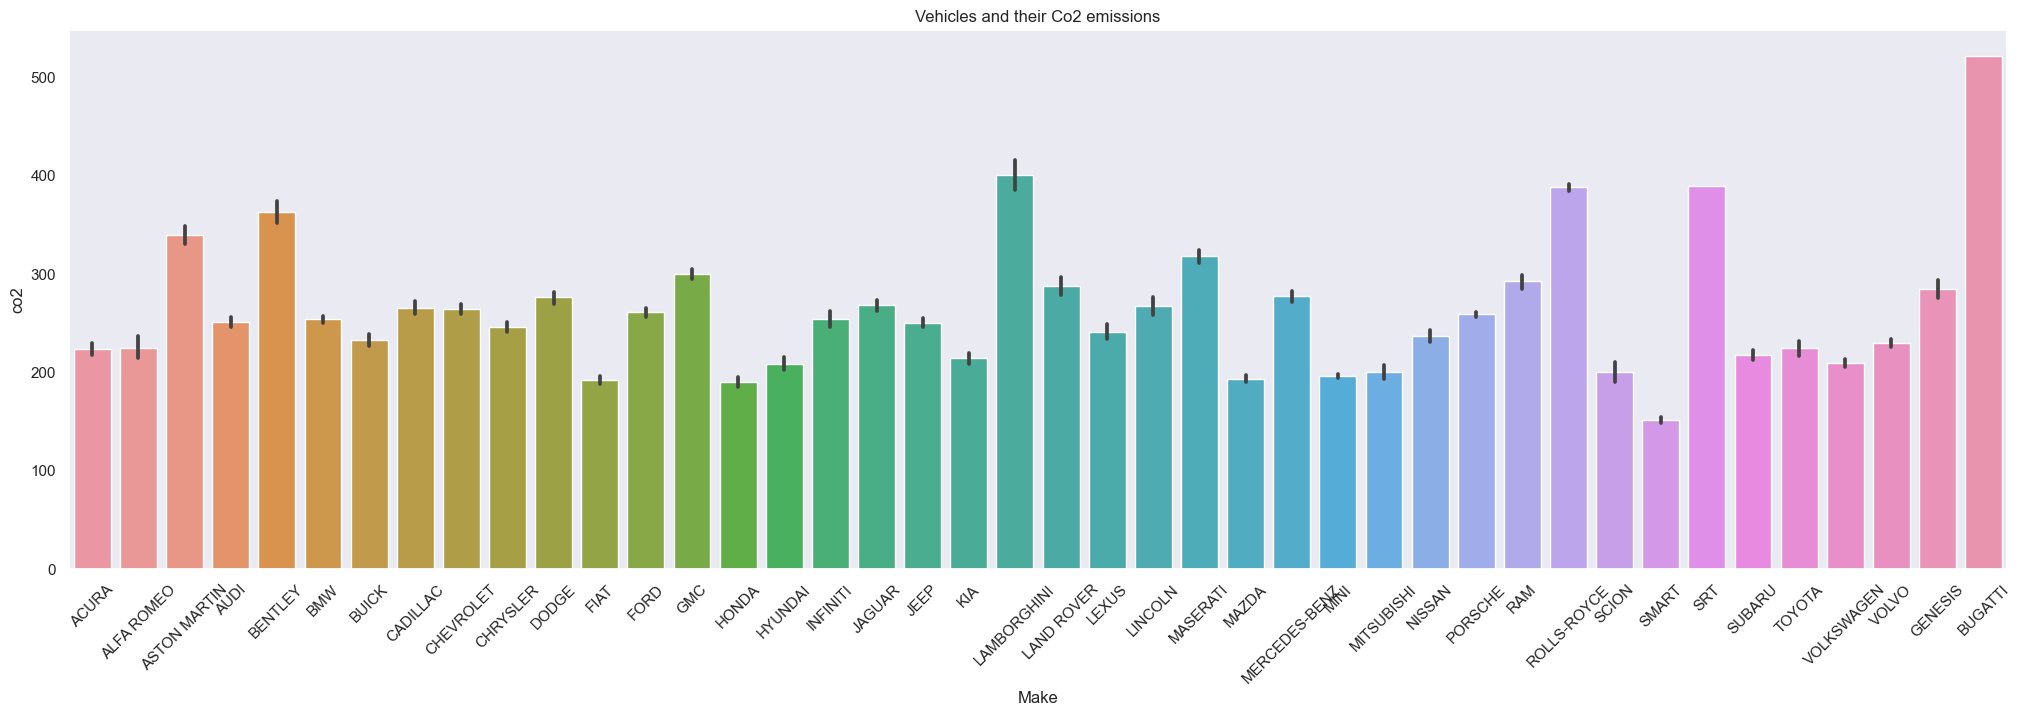

In [1211]:
f, ax = plt.subplots(figsize=(25,7))
sns.set_theme(style="darkgrid")

x = df.Make.value_counts().sort_values()

ax = sns.barplot(data=df,x='Make',y='co2')
plt.title('Vehicles and their Co2 emissions')
plt.xticks(rotation=45)
plt.show()

The graphic bellow shows the number of cylinders by car brand

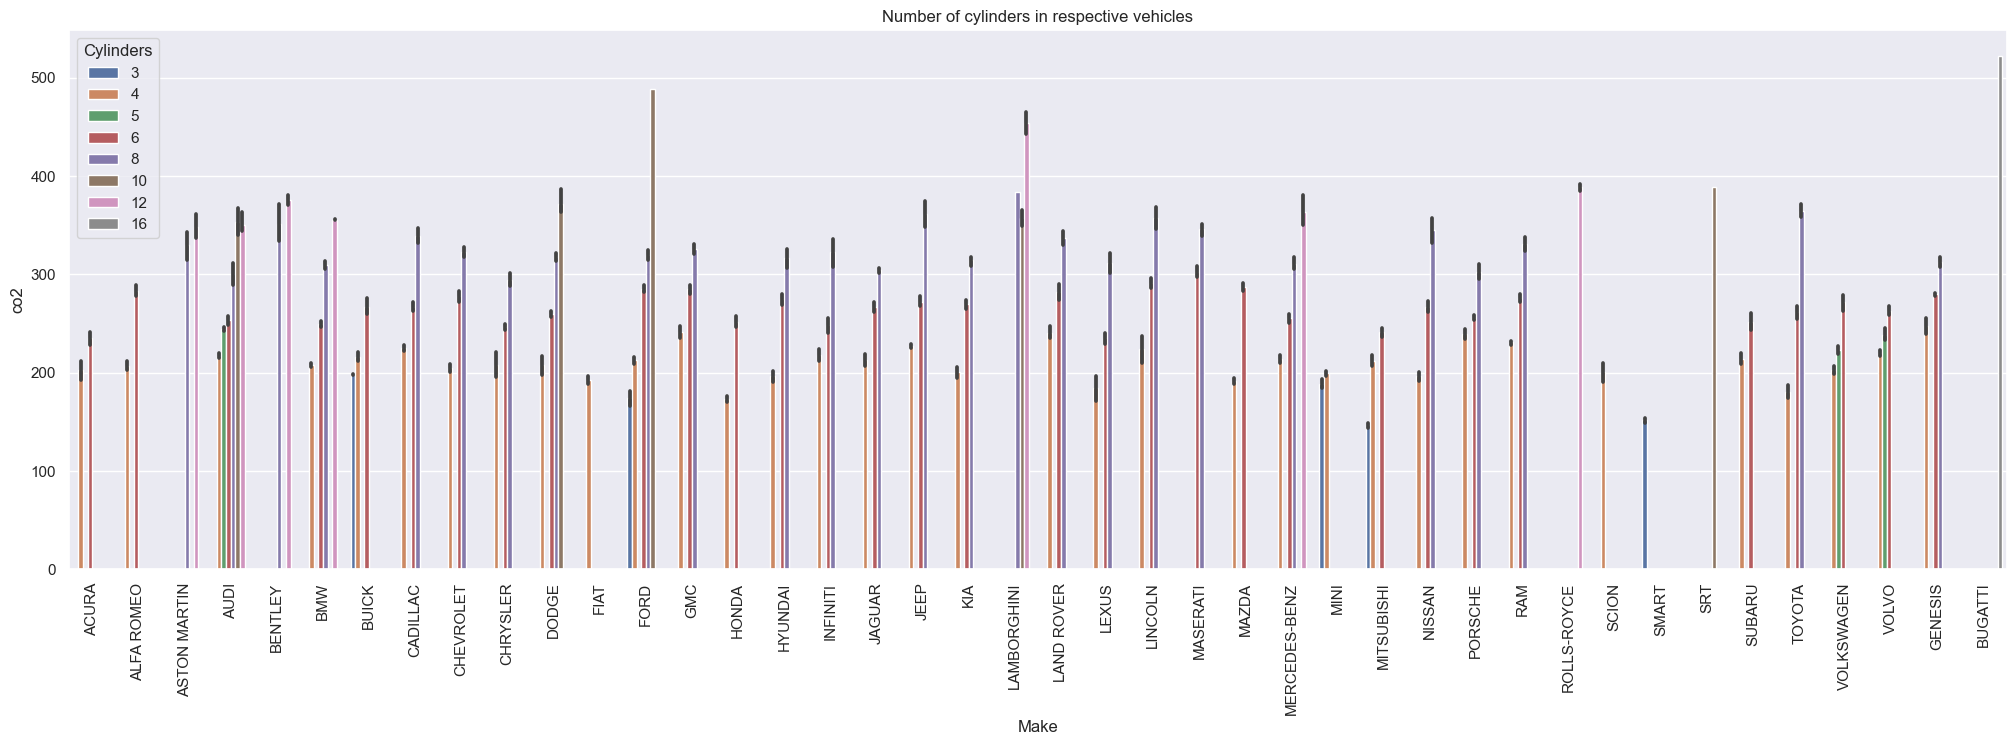

In [1212]:
f, ax = plt.subplots(figsize=(25,7))
sns.set_theme(style="darkgrid")

x = df.Make.value_counts().sort_values()

ax = sns.barplot(data=df,x='Make',y='co2', hue='Cylinders')
plt.title('Number of cylinders in respective vehicles')
plt.xticks(rotation=90)
plt.show()

Shows the cars that produce more CO2, with it is not suprisingly the fastest ones. Because in order to a car be fast it is not just about aerodynamics, or having a great engine, it is also about expeling exaust fumes as quickly as possible to obtain maximum performance, therefore if we want to expell the fumes as fast as possible the cars must have almost a straith pipe and not caring about CO2 emissions,

In [1213]:
df[df.co2 == df.co2.max()]

,Make,Model,vehicle_class,engine_size,Cylinders,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,co2
4509,BUGATTI,CHIRON,TWO-SEATER,8.0,16,Gasoline,26.8,16.6,22.2,522
5575,BUGATTI,Chiron,TWO-SEATER,8.0,16,Gasoline,26.8,16.6,22.2,522
6640,BUGATTI,Chiron,TWO-SEATER,8.0,16,Gasoline,26.8,16.6,22.2,522


Shows only the JEEP brand cars
As we can se by comparing with the Bugatti brand the fuel consumption of the Jeep products it is much lesser than the Bugatti's, they also have much less engine size and less than half of the cylinders.
With that being said the CO2 emissions are less too

In [1214]:
df[df.Make == 'JEEP']

,Make,Model,vehicle_class,engine_size,Cylinders,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,co2
569,JEEP,CHEROKEE,SUV - SMALL,2.4,4,Gasoline,10.9,7.7,9.5,218
570,JEEP,CHEROKEE,SUV - SMALL,3.2,6,Gasoline,12.3,8.3,10.5,242
571,JEEP,CHEROKEE 4X4,SUV - SMALL,2.4,4,Gasoline,11.3,8.3,10.0,230
572,JEEP,CHEROKEE 4X4,SUV - SMALL,3.2,6,Gasoline,12.5,8.8,10.8,248
573,JEEP,CHEROKEE 4X4 ACTIVE DRIVE II,SUV - SMALL,2.4,4,Gasoline,11.4,8.6,10.1,232
...,...,...,...,...,...,...,...,...,...,...
7031,JEEP,Wrangler Unlimited 4X4 eTorque,SUV - SMALL,2.0,4,Gasoline,11.3,10.5,10.9,257
7032,JEEP,Wrangler Unlimited 4X4 EcoDiesel,SUV - SMALL,3.0,6,Diesel,10.6,8.1,9.5,255
7033,JEEP,Wrangler Unlimited 4X4,SUV - SMALL,3.6,6,Gasoline,12.9,10.7,11.9,280
7034,JEEP,Wrangler Unlimited 4X4 eTorque,SUV - SMALL,3.6,6,Gasoline,12.6,10.7,11.8,276


Shows only the BMW brand cars
By comparasing with the Jeep cars the BMW's are more fuel efficient in city, in highway and combined, they also have less engine size and less cylinders, so that results in less CO2 Emissions all toghether.

In [1215]:
df[df.Make == 'BMW']

,Make,Model,vehicle_class,engine_size,Cylinders,fuel_type,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,co2
76,BMW,320i,COMPACT,2.0,4,Gasoline,10.0,6.5,8.4,193
77,BMW,320i,COMPACT,2.0,4,Gasoline,10.4,6.7,8.7,200
78,BMW,320i xDRIVE,COMPACT,2.0,4,Gasoline,10.2,7.0,8.8,202
79,BMW,328d xDRIVE,COMPACT,2.0,4,Diesel,7.6,5.5,6.7,181
80,BMW,328d xDRIVE TOURING,STATION WAGON - SMALL,2.0,4,Diesel,7.6,5.5,6.7,181
...,...,...,...,...,...,...,...,...,...,...
6635,BMW,X7 xDrive40i,SUV - STANDARD,3.0,6,Gasoline,12.0,9.4,10.8,254
6636,BMW,X7 xDrive50i,SUV - STANDARD,4.4,8,Gasoline,15.5,11.4,13.6,318
6637,BMW,X7 M50i,SUV - STANDARD,4.4,8,Gasoline,15.5,11.4,13.6,318
6638,BMW,Z4 sDrive30i,TWO-SEATER,2.0,4,Gasoline,9.5,7.4,8.5,200


Creates an histogram to be able to compare the number of cylinder in the various cars. As we can see for the histogram bellow it is well known that there are many cars with 4 cylinders with until few years back was the standard number of cylinders and with had more reliability. 

Remember less moving parts more reliable it is.

The cars with more cylinders tend to use a lot of fuel because there are design for speed and therefore it is less likely to be used by normal people wanting to go from point A to point B reliably and confortably.

In [1216]:
fig = px.histogram(df, x="Cylinders")
fig.update_layout(title_text='Cylinders in Vehicles',xaxis_title="Cylinders",yaxis_title="Number of vehicles " )
fig.show()

Shows more detailed information that the graphic, about the absolute values of number of cylinders

In [1217]:
df.Cylinders.value_counts()

4     3220
6     2446
8     1402
12     151
3       95
10      42
5       26
16       3
Name: Cylinders, dtype: int64

Count how many cylinders there are from each type and makes a normal distribution

In [1218]:
df['Cylinders'].value_counts(normalize=True)

4     0.436019
6     0.331212
8     0.189844
12    0.020447
3     0.012864
10    0.005687
5     0.003521
16    0.000406
Name: Cylinders, dtype: float64

Shows the models of the Brand Lamborguini

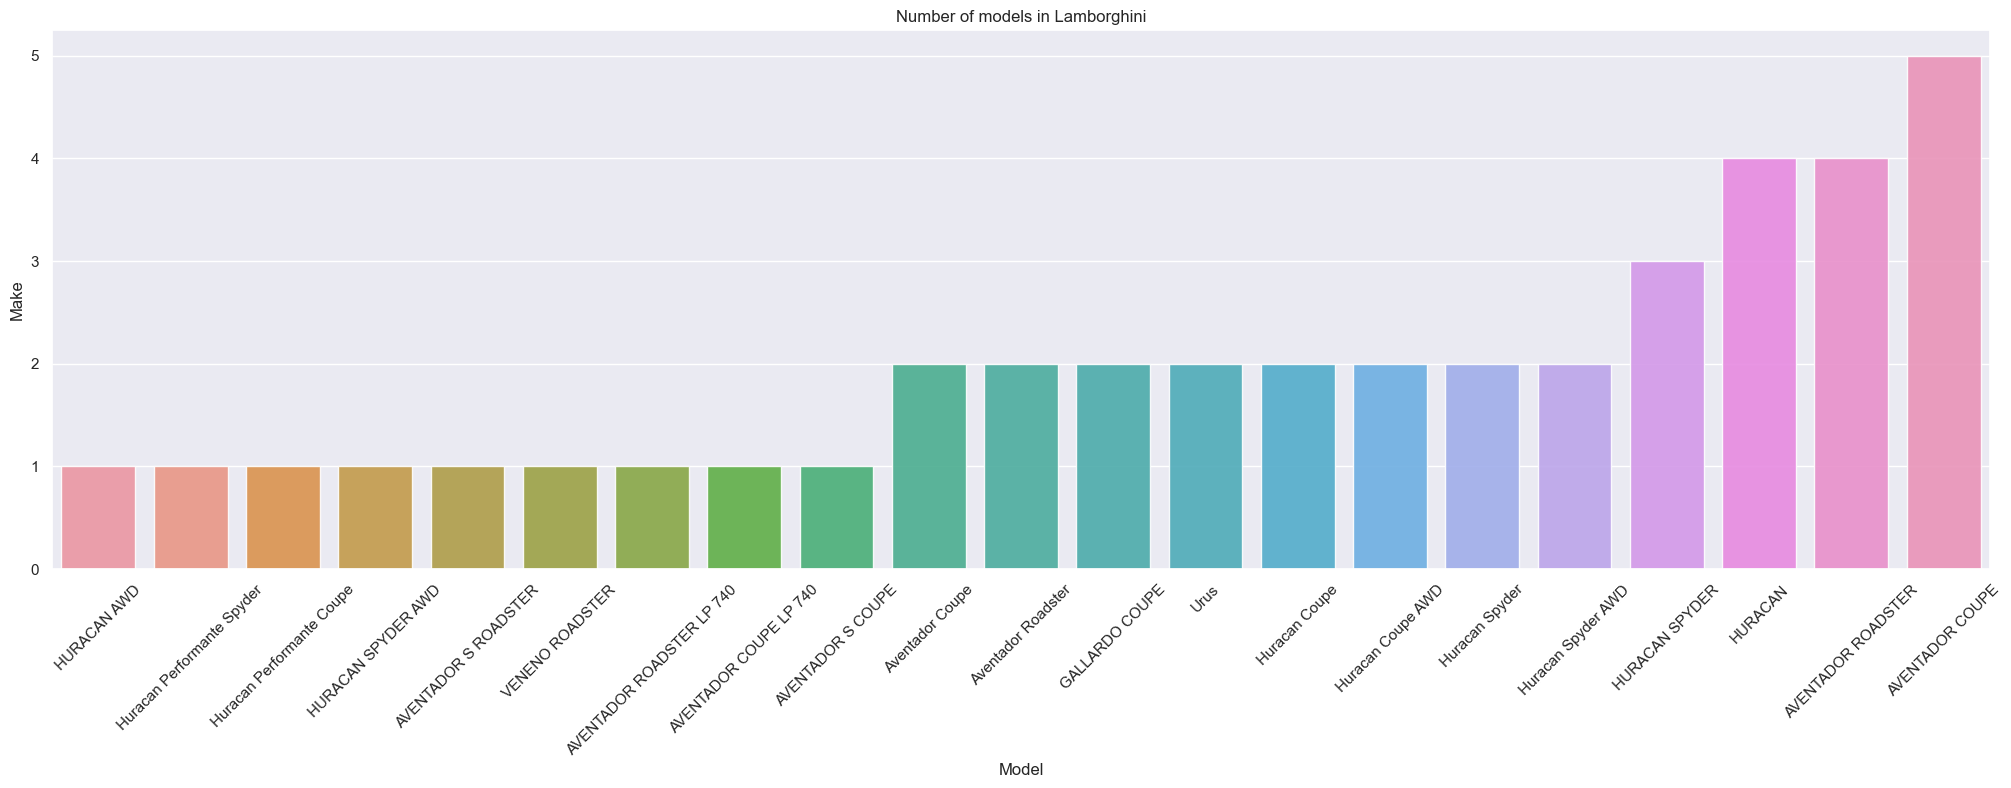

In [1219]:
lamborghini = df[df.Make == 'LAMBORGHINI']
lamborghini_models = lamborghini.groupby('Model').count().reset_index().sort_values('Make', ascending=True)

f, ax = plt.subplots(figsize=(25,7))
sns.set_theme(style="dark")
ax = sns.barplot(data=lamborghini_models, y='Make',x='Model',alpha=.9)
plt.title('Number of models in Lamborghini')
plt.xticks(rotation=45)
plt.show()

Uses a Box-Plot to identify the outliers

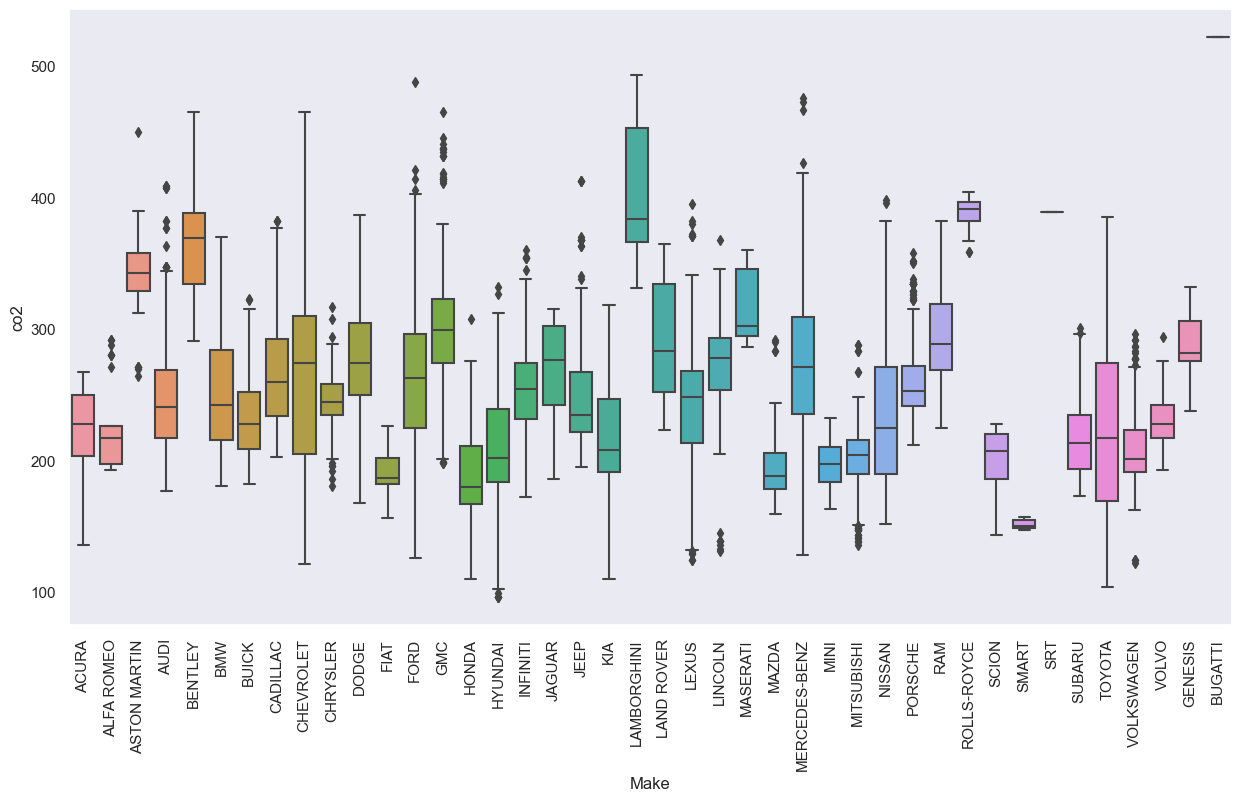

In [1220]:
plt.figure(figsize = (15,8))
sns.boxplot(x="Make", y="co2", data=df)
plt.xticks(rotation = 90)
plt.show()

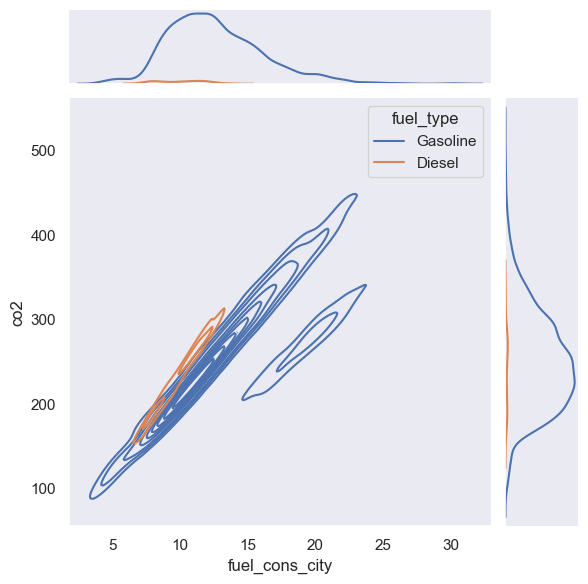

In [1221]:
sns.jointplot(
    data=df,
    x="fuel_cons_city", y="co2", hue="fuel_type",
    kind="kde"
)
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.


In [1222]:
cel =df['Cylinders'].value_counts().reset_index()
fig = px.pie(cel, values='Cylinders', names='index')
fig.update_layout(title="Cylinders")
fig.show()

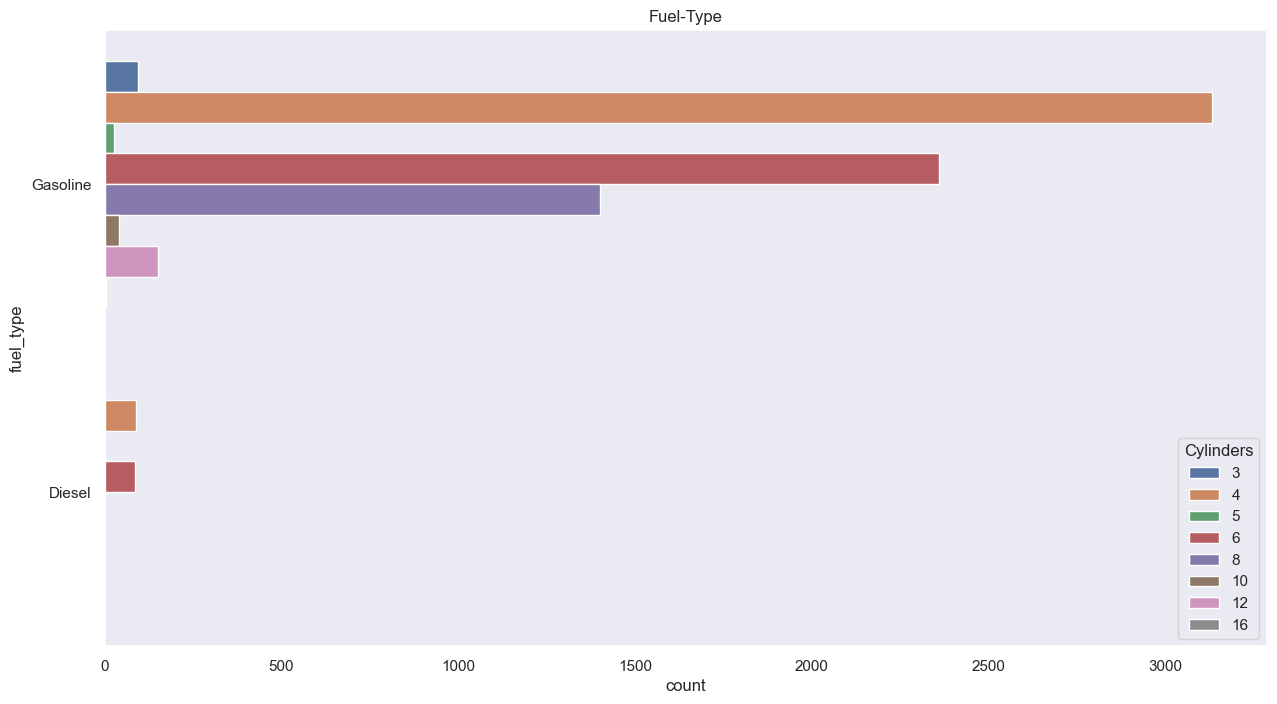

In [1223]:
plt.figure(figsize = (15,8))
sns.countplot(y="fuel_type", data=df, hue='Cylinders')
plt.title('Fuel-Type')
plt.show()

In [1224]:
fig = go.Figure(data=go.Violin(y=df["fuel_cons_city"],
                               box_visible=True,
                               line_color='black',
                               meanline_visible=True,
                               fillcolor='purple', opacity=0.4,
                               x0='Fuel Consumption in City'))

fig.show()

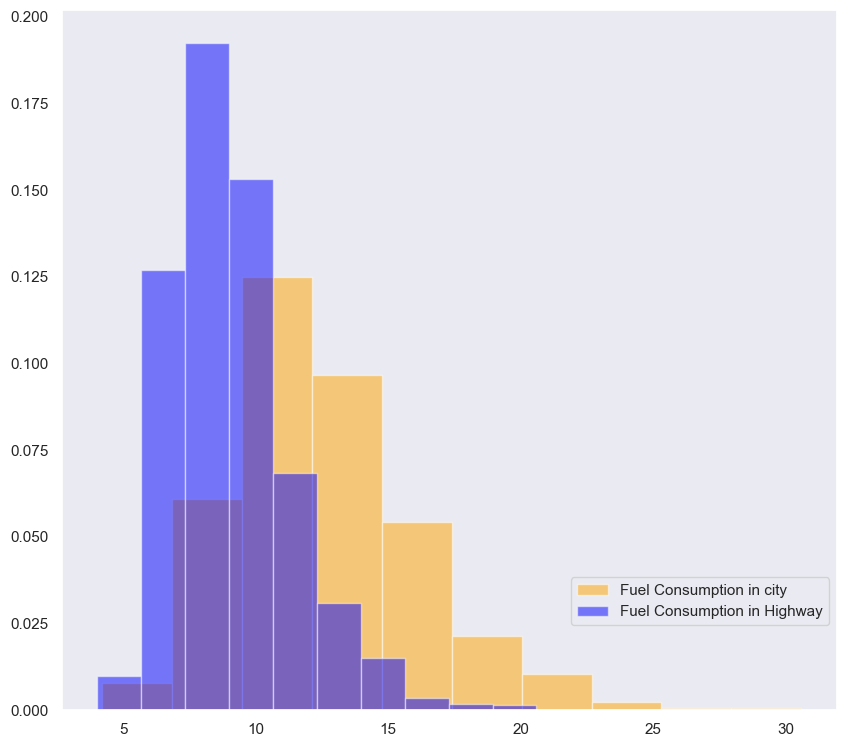

In [1225]:
fig = plt.figure(figsize = (10,20))
ax = fig.add_subplot(2,1,1)
ax = plt.hist(df['fuel_cons_city'], color="orange", label="Fuel Consumption in city", density=True, alpha=0.5)
ax = plt.hist(df['fuel_cons_hwy'], color="blue", label="Fuel Consumption in Highway", density=True, alpha=0.5)
ax = plt.legend(bbox_to_anchor=(1, 0.2))
plt.show()

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:316: UserWarning:

Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.

<AxesSubplot:xlabel='fuel_cons_hwy', ylabel='Density'>

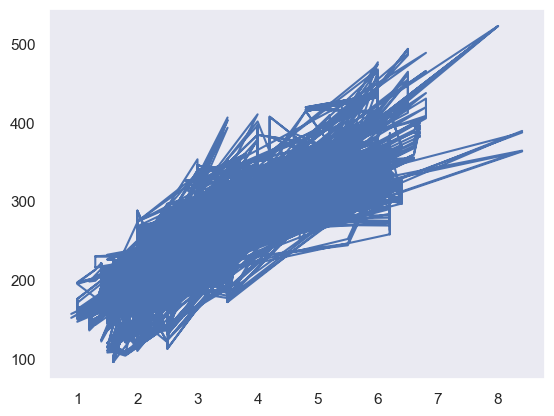

In [1226]:
plt.plot(df["engine_size"], df["co2"])

<Axes: xlabel='engine_size', ylabel='co2'>

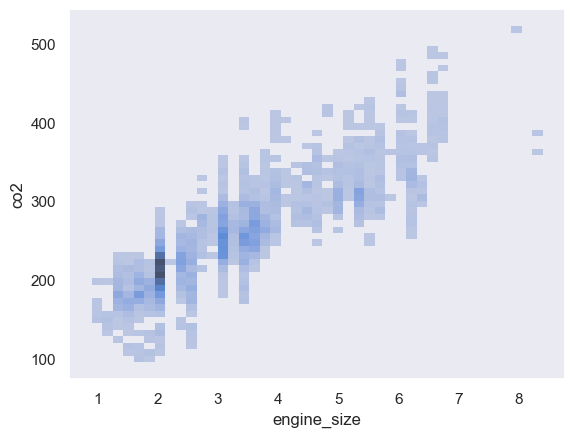

In [1227]:
sns.histplot(df, x="engine_size", y="co2")

In [1228]:
df.corr()

C:\Users\vasco\AppData\Local\Temp\ipykernel_1616\1134722465.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



,engine_size,Cylinders,fuel_cons_city,fuel_cons_hwy,fuel_cons_comb,co2
engine_size,1.000000,0.927653,0.831379,0.761526,0.817060,0.851145
Cylinders,0.927653,1.000000,0.800702,0.715252,0.780534,0.832644
fuel_cons_city,0.831379,0.800702,1.000000,0.948180,0.993810,0.919592
fuel_cons_hwy,0.761526,0.715252,0.948180,1.000000,0.977299,0.883536
fuel_cons_comb,0.817060,0.780534,0.993810,0.977299,1.000000,0.918052
co2,0.851145,0.832644,0.919592,0.883536,0.918052,1.000000


C:\Users\vasco\AppData\Local\Temp\ipykernel_1616\3822008766.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



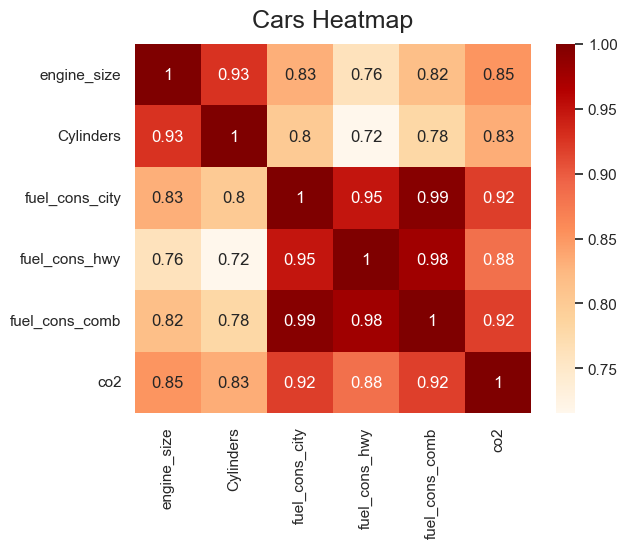

In [1229]:
cor = df.corr()
heatmap = sns.heatmap(cor, annot=True , cmap='OrRd')

heatmap.set_title('Cars Heatmap', fontdict={'fontsize':18}, pad=12);

In [1230]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import (StandardScaler, 
                                   PolynomialFeatures)


In [1231]:
y_col = "co2"

X = df.drop(y_col, axis=1)
y = df[y_col]
X = df[['engine_size', 'Cylinders', 'fuel_cons_city', 'fuel_cons_hwy', 'fuel_cons_comb']]
print("X = ", X)
print("Y = ", y)

X =        engine_size  Cylinders  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb
0             2.0          4             9.9            6.7             8.5
1             2.4          4            11.2            7.7             9.6
2             1.5          4             6.0            5.8             5.9
3             3.5          6            12.7            9.1            11.1
4             3.5          6            12.1            8.7            10.6
...           ...        ...             ...            ...             ...
7380          2.0          4            10.7            7.7             9.4
7381          2.0          4            11.2            8.3             9.9
7382          2.0          4            11.7            8.6            10.3
7383          2.0          4            11.2            8.3             9.9
7384          2.0          4            12.2            8.7            10.7

[7385 rows x 5 columns]
Y =  0       196
1       221
2       136
3       255
4    

In [1232]:
slr = LinearRegression()
y_col = "co2"

In [1233]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=72018)


In [1234]:
s = StandardScaler()
X_train_s = s.fit_transform(X_train)


In [1235]:
slr.fit(X_train_s, y_train)
X_test_s = s.transform(X_test)
y_pred = slr.predict(X_test_s)


In [1236]:
print(f'R2 score is {r2_score(y_pred,y_test)}')
print("Residual sum of squares (MSE): %.2f" % np.mean((y_pred - y_test) ** 2))

R2 score is 0.8589168867732015
Residual sum of squares (MSE): 421.41


Deep Learning With Linear Regression
Tensorflow Regression Problem -> https://youtu.be/-vHQub0NXI4

In [1237]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.optimizers import RMSprop

Split the dataset into training and test

In [1238]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

In [1239]:
train_stats = df.describe()
train_stats.pop("co2")
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
engine_size,7385.0,3.160068,1.354170,0.9,2.0,3.0,3.7,8.4
Cylinders,7385.0,5.615030,1.828307,3.0,4.0,6.0,6.0,16.0
fuel_cons_city,7385.0,12.556534,3.500274,4.2,10.1,12.1,14.6,30.6
fuel_cons_hwy,7385.0,9.041706,2.224456,4.0,7.5,8.7,10.2,20.6
fuel_cons_comb,7385.0,10.975071,2.892506,4.1,8.9,10.6,12.6,26.1


In [1240]:
train_dataset.pop("Make")
train_dataset.pop("Model")

test_dataset.pop("Make")
test_dataset.pop("Model")

0                  ILX
7               TL AWD
21          A4 QUATTRO
24          A5 QUATTRO
25          A5 QUATTRO
             ...      
7360    Arteon 4MOTION
7363              Golf
7364          Golf GTI
7370            Passat
7382       XC60 T6 AWD
Name: Model, Length: 1477, dtype: object

In [1241]:
train_dataset.pop("fuel_type")

test_dataset.pop("fuel_type")

0       Gasoline
7       Gasoline
21      Gasoline
24      Gasoline
25      Gasoline
          ...   
7360    Gasoline
7363    Gasoline
7364    Gasoline
7370    Gasoline
7382    Gasoline
Name: fuel_type, Length: 1477, dtype: object

In [1242]:
train_dataset.pop("vehicle_class")

test_dataset.pop("vehicle_class")

0           COMPACT
7          MID-SIZE
21          COMPACT
24       SUBCOMPACT
25       SUBCOMPACT
           ...     
7360      FULL-SIZE
7363        COMPACT
7364        COMPACT
7370       MID-SIZE
7382    SUV - SMALL
Name: vehicle_class, Length: 1477, dtype: object

In [1243]:
train_labels = train_dataset.pop("co2")
test_labels = test_dataset.pop("co2")

Normalize the data

In [1244]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']
normed_train_data = norm(train_dataset)
normed_test_data = norm(test_dataset)

Build the model

In [1245]:
print(keras.__version__)

2.12.0


In [1246]:
def build_model():
    model = keras.Sequential([
        #It has 5 layers because it is the number of features, and using the relu activation function
        layers.Dense(5, activation=tf.nn.relu, input_shape=[len(train_dataset.keys())]),
        #The next layer in the network has the double of the neurons, it should not be more than the double
        #so it does not make overfitting, and it uses the relu activation function
        layers.Dense(10, activation=tf.nn.relu),
        #The last layer only has one neuron that means this is the output one
        layers.Dense(1)
    ])

    optimizer = RMSprop(learning_rate=0.001)

    #mse -> mean square error
    #mae -> mean absolute error
    model.compile(loss='mse', optimizer=optimizer, metrics=['mae', 'mse'])
    return model

model = build_model()

In [1247]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_24 (Dense)            (None, 5)                 30        
                                                                 
 dense_25 (Dense)            (None, 10)                60        
                                                                 
 dense_26 (Dense)            (None, 1)                 11        
                                                                 
Total params: 101
Trainable params: 101
Non-trainable params: 0
_________________________________________________________________


Try out the model withouth training

In [1248]:
print(normed_train_data[:10])

      engine_size  Cylinders  fuel_cons_city  fuel_cons_hwy  fuel_cons_comb
6307    -0.118204   0.210561       -0.158997      -0.378387       -0.233386
5036    -0.856663  -0.883348       -0.958934      -0.558207       -0.855684
1995     0.472564   0.210561       -0.016151      -0.018749        0.008618
4156    -0.487433  -0.883348       -1.073211      -1.142619       -1.097689
6328    -0.118204   0.210561       -0.444689      -0.243523       -0.371675
1696    -0.561279  -0.883348        0.469525       0.385844        0.423484
4313     0.251026   0.210561        0.355248       1.150076        0.630916
5685     0.324872   0.210561        0.326679       0.206025        0.285195
4902    -1.152047  -0.883348       -1.016073      -0.468297       -0.821112
6873    -0.339741  -0.883348        0.040987       0.880347        0.354339


In [1249]:
example_batch = normed_train_data[:10]
example_result = model.predict(np.asarray(example_batch).astype('float32'))
example_result

1/1 [==============================] - 0s 70ms/step


array([[-0.04367251],
       [ 0.5710988 ],
       [-0.01154629],
       [ 0.30992943],
       [ 0.00686644],
       [ 0.50949043],
       [ 0.21370593],
       [ 0.02498463],
       [ 0.7385755 ],
       [ 0.6578208 ]], dtype=float32)

In [1250]:
print(train_labels)

6307    241
5036    229
1995    253
4156    183
6328    231
       ... 
5720    339
6580    206
542     253
2725    179
2454    306
Name: co2, Length: 5908, dtype: int64


Train the model
    Train the model for 1000 epochs, and record the training and validation accuracy in the history object

In [1251]:
#Display training process by printing a single dot for each completed epoch
class PrintDot(keras.callbacks.Callback):

    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:
            print('')
        print('.', end='')

EPOCHS = 1000

history = model.fit(
    normed_train_data, train_labels,
    epochs=EPOCHS, validation_split=0.2, verbose=0,
    callbacks=[PrintDot()]
)

c:\Users\vasco\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\engine\data_adapter.py:1700: FutureWarning:

The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.




....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

Visualize the model's training progress using the stats stored in the history object

In [1252]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,mse,val_loss,val_mae,val_mse,epoch
995,144.125931,5.111076,144.125931,166.373016,5.387793,166.373016,995
996,144.148666,5.082480,144.148666,165.187057,5.993917,165.187057,996
997,143.320786,5.102940,143.320786,171.522202,5.604993,171.522202,997
998,144.357056,5.065047,144.357056,159.005127,5.425383,159.005127,998
999,144.469299,5.081794,144.469299,165.268906,5.585678,165.268906,999


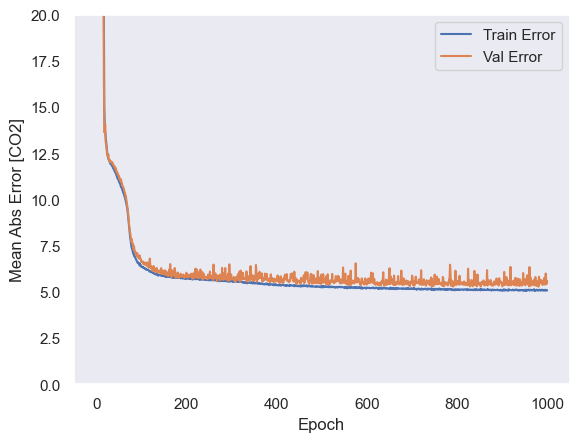

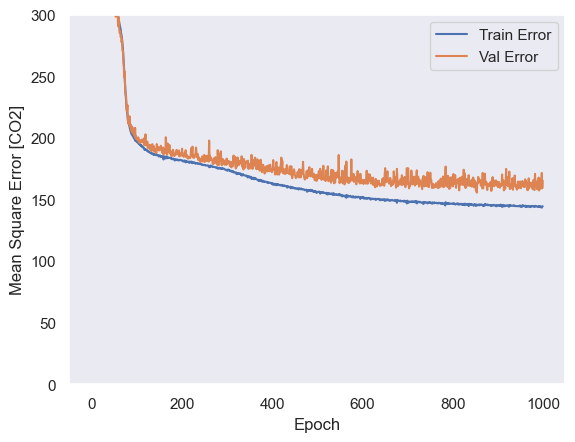

In [1259]:
import matplotlib.pyplot as plt

def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Abs Error [CO2]')
    plt.plot(hist['epoch'], hist['mae'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mae'], label='Val Error')
    plt.legend()
    plt.ylim([0,20])

    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('Mean Square Error [CO2]')
    plt.plot(hist['epoch'], hist['mse'], label='Train Error')
    plt.plot(hist['epoch'], hist['val_mse'], label='Val Error')
    plt.legend()
    plt.ylim([0, 300])

plot_history(history)

Since We don't see the errors going up that means that there is no overfitting

Prints the Mean Absolute Error

In [1260]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels, verbose=0)
print("Testing set Mean Abs Error: {:5.2f} CO2".format(mae))

Testing set Mean Abs Error:  5.14 CO2


5.14g/Km of error it is a good error

Make Predictions

47/47 [==============================] - 0s 3ms/step


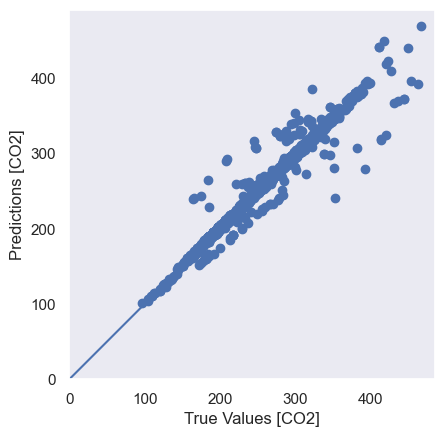

In [1262]:
test_predictions = model.predict(normed_test_data).flatten()

plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [CO2]')
plt.ylabel('Predictions [CO2]')
plt.axis('equal')
plt.axis('square'),
plt.xlim([0, plt.xlim()[1]])
plt.ylim([0, plt.ylim()[1]])
_=plt.plot([-100, 100], [-100, 100])

Looking at Error Distribution

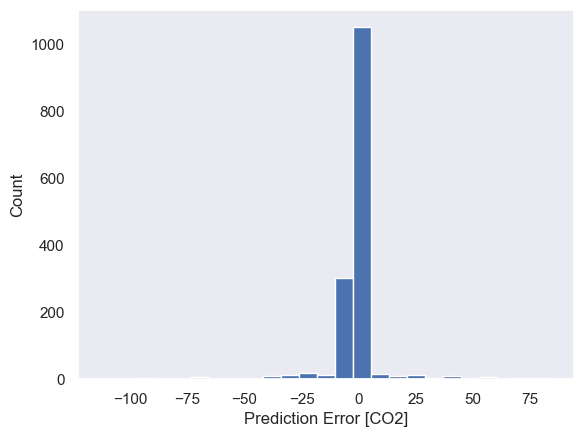

In [1263]:
error = test_predictions - test_labels
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error [CO2]")
_= plt.ylabel("Count")

Trying to predict CO2 Emissions of my cars

In [1264]:
#test_seat_ibiza = 
test_predictions = model.predict(normed_test_data).flatten()
print(test_predictions) 

47/47 [==============================] - 0s 2ms/step
[198.57208 258.09372 232.17172 ... 204.49345 203.25786 239.46028]
